### Monte Carlo - Euler Discretization - INFY

In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
from datetime import datetime 
import nsepy as nse
%matplotlib inline

In [2]:
from nsepy import get_history
from datetime import date

In [3]:
tickers = ['INFY']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = nse.get_history(t, index = False, start = date(2018, 1, 1), end = date(2023, 3, 24))['Close']

In [4]:
sec_data

,INFY
Date,
2018-01-01,1033.55
2018-01-02,1029.70
2018-01-03,1021.30
2018-01-04,1015.40
2018-01-05,1012.00
...,...
2023-03-20,1403.65
2023-03-21,1390.70
2023-03-22,1389.25


In [5]:
log_returns = np.log(1 + sec_data.pct_change())
log_returns

,INFY
Date,
2018-01-01,NaN
2018-01-02,-0.003732
2018-01-03,-0.008191
2018-01-04,-0.005794
2018-01-05,-0.003354
...,...
2023-03-20,-0.012074
2023-03-21,-0.009269
2023-03-22,-0.001043


<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [7]:
r = 0.064

In [8]:
stdev = log_returns.std()*250**0.5
stdev

INFY    0.408863
dtype: float64

In [9]:
type(stdev)

pandas.core.series.Series

In [10]:
stdev = stdev.values
stdev

array([0.40886321])

In [11]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals

iterations = 10000

In [12]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = sec_data.iloc[-1]
S[0] = S0

In [13]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

In [14]:
S

array([[1380.65      , 1380.65      , 1380.65      , ..., 1380.65      ,
        1380.65      , 1380.65      ],
       [1383.25839046, 1407.60128682, 1338.52141759, ..., 1377.31214601,
        1363.46159158, 1362.76714146],
       [1406.64087036, 1437.78050176, 1330.06935336, ..., 1319.09501072,
        1358.92680747, 1352.16896424],
       ...,
       [1779.82906824, 2649.86058388, 1420.60275669, ..., 1062.66216862,
        1116.34090425,  878.3475792 ],
       [1768.76713662, 2665.89721427, 1444.16541204, ..., 1081.98062657,
        1078.62876315,  865.35343268],
       [1822.7406323 , 2702.6816473 , 1470.58026277, ..., 1110.49109383,
        1031.91792407,  874.74243192]])

In [15]:
S.shape

(251, 10000)

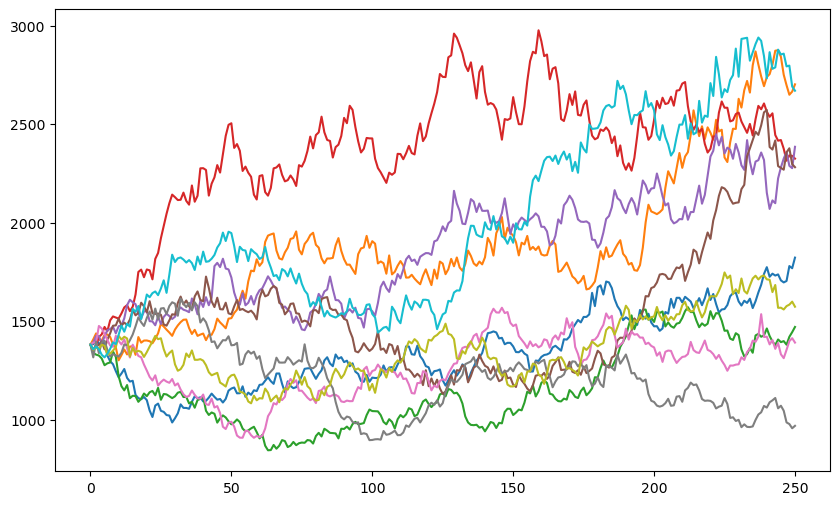

In [16]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

In [21]:
Payoff = np.maximum(S[-1] - 1400, 0)
Payoff

array([ 422.7406323 , 1302.6816473 ,   70.58026277, ...,    0.        ,
          0.        ,    0.        ])

In [22]:
Payoff.shape

(10000,)

In [23]:
Call = np.exp(-r * T) * np.sum(Payoff) / iterations
Call

266.7218170388345